## Learning objectives
- Understand how the parameter of hte model influences the probabilities of seeing different values from a model.
- Predict how models with different probability of observations taking on certain values will generate different data
- Implement the principle of maximum likelihood to find the best model.

# 1. Probabilities in Bernoulli, `pmf`

As we have discussed a lot, 92% of our plants had an A at marker MASC06116.  We have formed a model in our heads that says, if we get a new plant, that plant has a 92% chance (probability = 0.92) of having an A. 

Yesterday we simulated data from different models to see what the data looked like and how close it was to our real data. But we can directly compare the model and the data by using the model to calculate the probability of getting a particular observation, under that model.

**Exercise 1.1**: What is the probability of getting a 1 if the data follows Bernoulli with p = 0.1? What about p = 0.9?

<font color = lightgreen>
<ul> 
<li>p = 0.1: 0.1</li>
<li>p = 0.9: 0.9</li>
</ul>

**Exercise 1.2**: The p=0.1 and p=0.9 are 2 different models that can generate binary observations. Which model is more likely for each of the following data sets (each containing 5 observations)?
1. `[0, 0, 1, 0, 0]` <font color = lightgreen>(p = 0.1)
2. `[1, 1, 1, 1, 0]` (p = 0.9)
  

We can have the model directly calculate the probability using the `pmf` function, which says: **for each observation, how likely are you to get this observation from this model**

In [1]:
## some imports...
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
from scipy.stats import bernoulli

In [2]:
bernoulli.pmf(1, p = 0.1)

0.1

**Exercise 1.3**: predict what the output will be. Write down your predictions. Run it and if it's different, figure out why

In [3]:
bernoulli.pmf(0, p = 0.1) # 0.1 (was 0.9, what was prob of 0 not 1)

0.9

In [4]:
bernoulli.pmf(0, p = 0.5) # 0.5

0.5

In [6]:
bernoulli.pmf(1, p = 0.5) # 0.5

0.5

In [7]:
bernoulli.pmf(0, p = 0.8) # 0.2

0.19999999999999996

**Exercise 1.4**: we can calculate it for any number of observations. Predict what this one will be, for 3 observations, then run it

In [9]:
print(0.2 * 0.8**2)
bernoulli.pmf([0,1,1], p = 0.8) # 0.2 * 0.8**2

0.12800000000000003


array([0.2, 0.8, 0.8])

## 1.1 From probability to likelihood
Note that this gave us the probility of each observation. We want to get an overall score of how close our model to our data so we can automatically pick a good model.  This is called the **likelihood** of seeing our data, given that model. The models with the highest likelihood is the best model.

We are going to use the *negative logarithm, summed across all observations* to get an overall picture of the closeness 

**Exercise 1.1.1**: Make a plot comparing 100 values between 0 and 1 (for probilities from the pmf function) versus their negative logs. Below is how your take the log. Then, interpret the plot. How do the axes compare?

In [10]:
np.log(.5)

-0.6931471805599453

In [11]:
np.log([1,1,1])

array([0., 0., 0.])

In [12]:
# import geno data
geno = pd.read_table("../data/arabmagic/arabmagic_geno.csv", sep=",",skiprows=3,index_col=0)
binary_marker = (geno.loc['MASC06116',:]== 'A').astype(int)

C:\Users\sjcde\AppData\Local\Temp/ipykernel_10288/2706297943.py:4: RuntimeWarning: divide by zero encountered in log
  logs.append(np.log(prob) * -1)


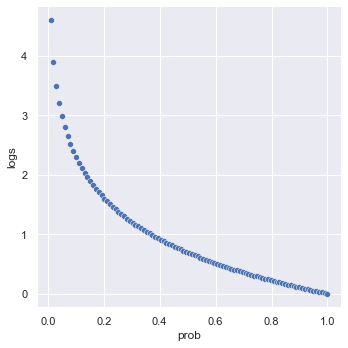

In [15]:
# Create 100 evenly spaced bins of probability between 0 and 1 (and an empty list)
bins = np.linspace(0, 1, 100)
logs = []
# For each probability
for prob in bins:
    # Take the negative log
    logs.append(np.log(prob) * -1)

# Create a dataframe with the probabilities in one column, and the log probabilities in another
logs_df = pd.DataFrame({'prob':bins, 'logs':logs})
# Plot the graph of log probability vs probability
sns.relplot(data=logs_df, x='prob', y='logs')

**Exercise 1.1.2**: You can copy over some of your code from the previous notebook Exercise 2.2.3. But change it to use the maximium likelihood to find the best model. Plot the value of p versus the likelihood.

C:\Users\sjcde\AppData\Local\Temp/ipykernel_10288/1472146811.py:5: RuntimeWarning: divide by zero encountered in log
  prob_logs = np.log(bernoulli.pmf(binary_marker, p=prob))


Maximum likelihood 0.9292929292929294


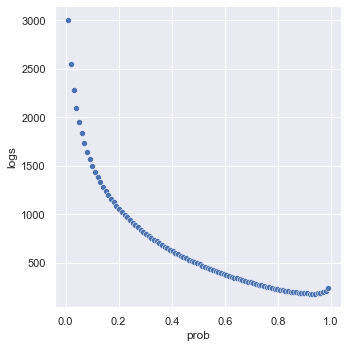

In [28]:
# Create 100 evenly spaced bins of probability between 0 and 1 (and an empty list)
bins = np.linspace(0, 1, 100)
logs = []

# For each probability of As
for prob in bins:
    # Take the log of the probability that each observation in our dataset would be observed
    # With the given probability
    prob_logs = np.log(bernoulli.pmf(binary_marker, p=prob))
    # Take the sum of all of the log(prob) measurements and multiply by -1
    logs.append(prob_logs.sum() * -1)

# Create a dataframe with the probability in 1 column and the negative log in another
logs_df = pd.DataFrame({'prob':bins, 'logs':logs})

# Plot the logs vs prob data and determine the probability with the maximum likelihood of explaining the real data
sns.relplot(data=logs_df, x='prob', y='logs')

print('Maximum likelihood', logs_df.loc[logs_df['logs'].idxmin(), 'prob'])

# 3. Normal (Gaussian) model for number data
Just like with the Binary data and the Bernoulli, there are built-in models for number data.

The bell curve aka Normal aka Guassian model is good for modeling data that is:
- numbers
- most of them are close to the mean
- distribution is symmetricl

Just like the Bernoulli we can import the `norm` (normal) and use it to generate observations. 

And just like the Bernoulli we can tell it to use  particular **parameters**. The first one we'll learn is called `loc` which specifies the mean. The default is 0:

In [ ]:
from scipy.stats import norm
norm.rvs()

Another `loc`.

In [ ]:
norm.rvs(loc = 10)

Sme thing with the size argument

In [ ]:
norm.rvs(loc = 10, size=5)

**Exercise 3.1**: Generate 1000 observations of the distribution under models with different values for `loc` (such as, -5, 1, 100). Plot each in a histogram. What do you notice?

**Exercise 3.2 (think & discuss)**: Look at the histogram of the fruit_length data. What model could you make that could generate observations that look like that:
- Would you use Bernoulli or normal? Why?
- What do you think would be a good `loc` to make a model of the fruit_length?

In [ ]:
sns.displot(data=pheno, x="fruit_length")

**Exercise 3.3**: *A*. Generate the data from your chosen model for the same number of plants as there is in the real data. Fill in the line below to make a data frame containing your real and generated data. 

In [ ]:
generated =  ## fill this in
lengths = np.append(pheno['fruit_length'].values, generated)
real = ['real']*pheno.shape[0]
gen = ['generated']*pheno.shape[0]
is_real = real + gen
toplot = pd.DataFrame({'fruit_length':lengths,
                       'is_real': is_real
                      })



*B*. Make a histogram that plots the real data and the generated data. Discuss: are you happy with your model? Does it seem to fit the data?

**Exercise 3.4 (discuss as a group)**: The code above uses some Python I have not taught you. What is it doing? Add comments to the code.

The reason the generated data doesn't look so good is because it is too wide. There is a second **parameter** called **`scale`** which controls how wide it is.

**Exercise 3.5**: Generate 703 observations of the distribution under models with the same loc above but different values for  values for `scale` (it must be greater than zero, you can't have a negative width)-- try 1, 5, 100). Plot each in a histogram. What do you notice?



**Exercise 3.6**: Plot a histogram of bolting days. Would a normal model be appropriate for bolting days?

**Exercise 3.7**: 
1. Create 20 evenly spaced values of `loc`  spaced out from 0 to 30. 
2. For each of these values, generate your plants, and get the squared difference in means like in 2.2.2. 


3. Plot on the x-axis "loc" and on the y-axis the squared difference in means.

4. Get the value where the difference is smallest 

**Exercise 3.8**: Repeat 3.7 but keeping your loc you picked in 3.7 and with 20 evenly spaced values for scale. Find the best secale.